<a href="https://colab.research.google.com/github/89874106365/dianasabirova/blob/main/%D0%BB%D0%B8%D0%BC%D0%BE%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving lemon.jpg to lemon (11).jpg


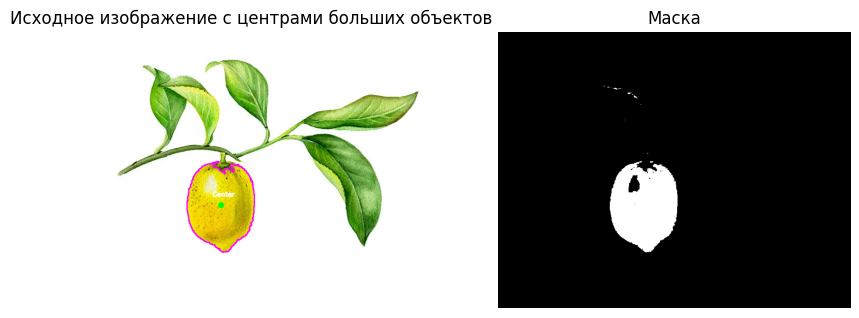

In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Загружаем изображение
uploaded = files.upload()
image_path = next(iter(uploaded))

# Считываем кадр
frame = cv2.imread(image_path)

# Преобразуем в HSV
frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Задаем пороги для желтого цвета
low_yellow = np.array([20, 110, 110])
high_yellow = np.array([30, 255, 255])

# Создаем маску
mask = cv2.inRange(frame_hsv, low_yellow, high_yellow)

# Находим контуры
contours, hierarchy = cv2.findContours(mask,
                                       cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_NONE)

# Задаем порог для площади контура
area_threshold = 500  # Вы можете изменить это значение в зависимости от ваших нужд

# Рисуем контуры и находим центры больших объектов
for contour in contours:
    # Проверяем площадь контура
    area = cv2.contourArea(contour)

    if area > area_threshold:
        # Рисуем контур
        cv2.drawContours(frame, [contour], -1, (255, 0, 255), 2)

        # Находим моменты
        M = cv2.moments(contour)

        # Вычисляем центр
        if M['m00'] != 0:
            cX = int(M['m10'] / M['m00'])
            cY = int(M['m01'] / M['m00'])

            # Рисуем центр
            cv2.circle(frame, (cX, cY), 7, (0, 255, 0), -1)  # Зеленый цвет для центра
            cv2.putText(frame, "Center", (cX - 20, cY - 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Выводим кадр
plt.figure(figsize=(10, 5))  # Размер в дюймах
plt.subplot(1, 2, 1)
plt.title('Исходное изображение с центрами больших объектов')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Маска')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.show()